# Understanding the dataset

## Loading the dataset

In [1]:
import pandas as pd

df = pd.read_csv('./playground/train.csv')
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [2]:
df.shape

(1200000, 21)

In [3]:
df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

## Performing EDA

In [5]:
df = df.drop(['id','Policy Start Date'],axis=1)

In [6]:
df.isnull().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [7]:
for feature in df:
    print(f"{feature}: {df[feature].dtype}")

Age: float64
Gender: object
Annual Income: float64
Marital Status: object
Number of Dependents: float64
Education Level: object
Occupation: object
Health Score: float64
Location: object
Policy Type: object
Previous Claims: float64
Vehicle Age: float64
Credit Score: float64
Insurance Duration: float64
Customer Feedback: object
Smoking Status: object
Exercise Frequency: object
Property Type: object
Premium Amount: float64


In [8]:
import numpy as np

features_with_NaN = [features for features in df.columns if df[features].isnull().sum()>0]

for feature in features_with_NaN:
    print(feature, np.round(df[feature].isnull().mean() * 100,4), '% missing values')

Age 1.5588 % missing values
Annual Income 3.7458 % missing values
Marital Status 1.5441 % missing values
Number of Dependents 9.1393 % missing values
Occupation 29.8396 % missing values
Health Score 6.173 % missing values
Previous Claims 30.3358 % missing values
Vehicle Age 0.0005 % missing values
Credit Score 11.4902 % missing values
Insurance Duration 0.0001 % missing values
Customer Feedback 6.4853 % missing values


In [9]:
df.nunique()


Age                         47
Gender                       2
Annual Income            88593
Marital Status               3
Number of Dependents         5
Education Level              4
Occupation                   3
Health Score            532657
Location                     3
Policy Type                  3
Previous Claims             10
Vehicle Age                 20
Credit Score               550
Insurance Duration           9
Customer Feedback            3
Smoking Status               2
Exercise Frequency           4
Property Type                3
Premium Amount            4794
dtype: int64

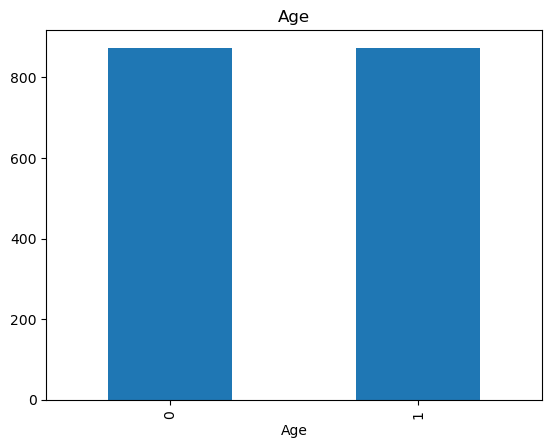

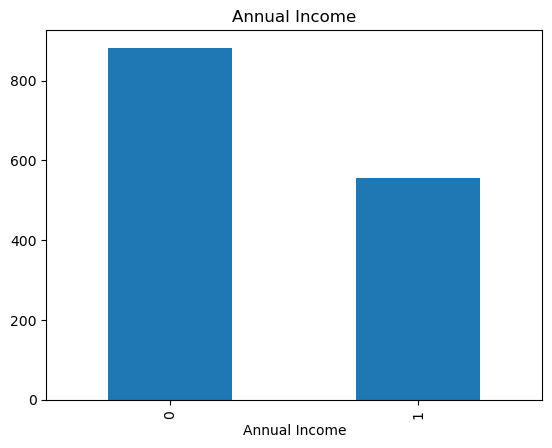

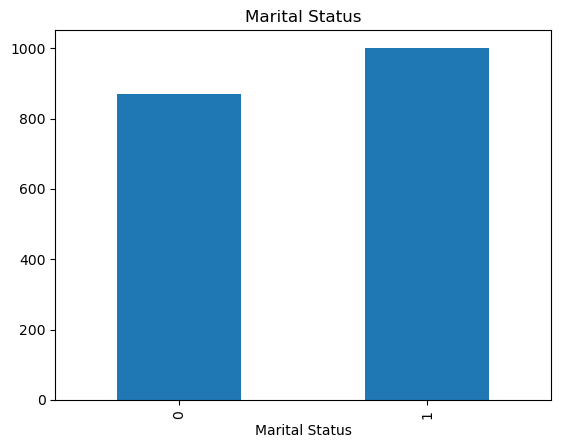

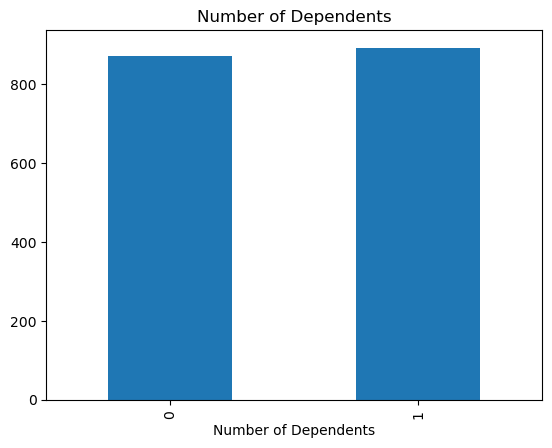

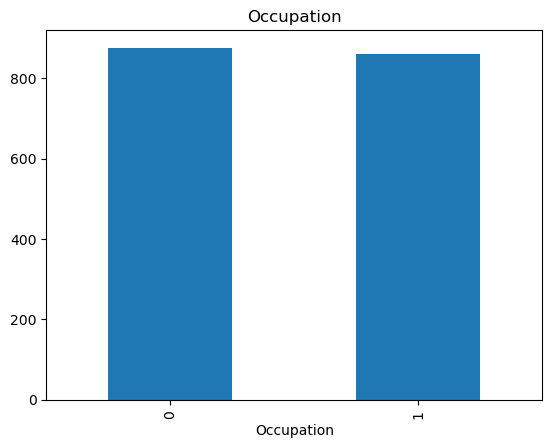

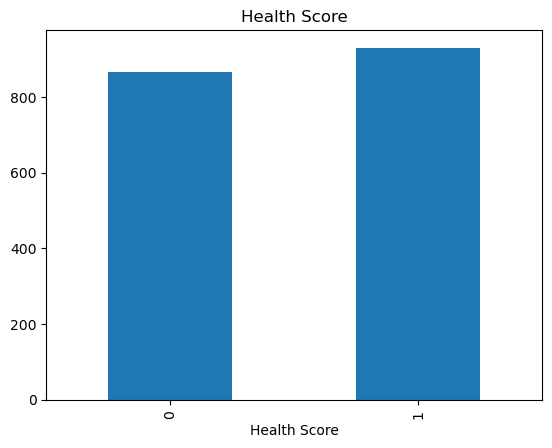

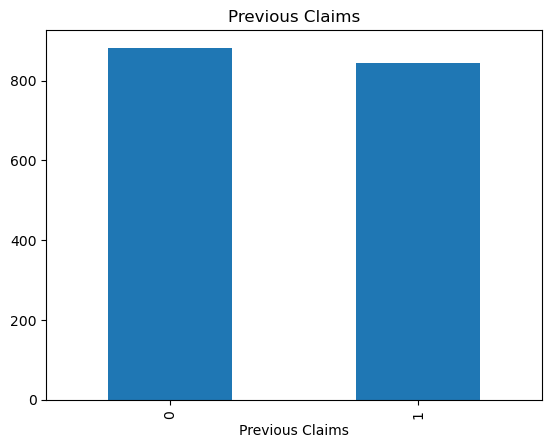

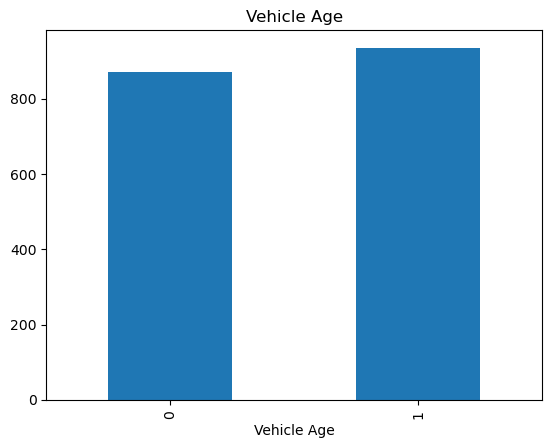

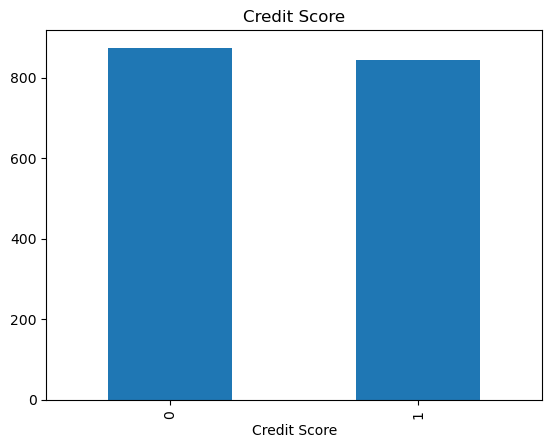

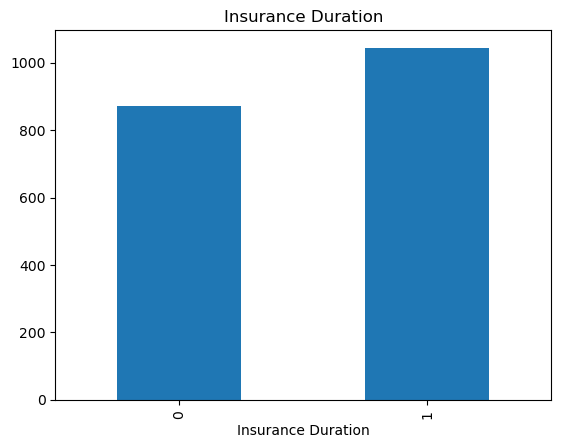

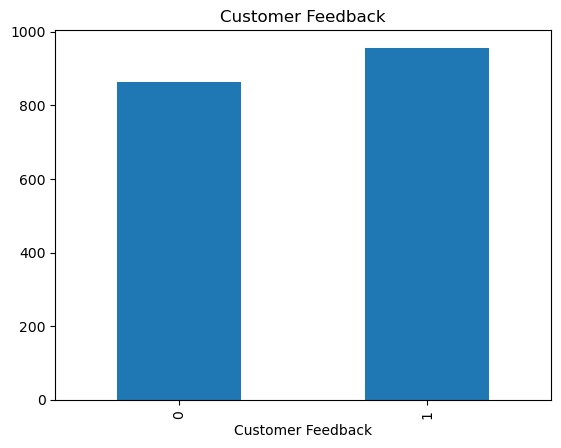

In [10]:
## find the relationship between the features with missing values and the premium amount(target)

import matplotlib.pyplot as plt
import seaborn as sns


for feature in features_with_NaN:
    data = df.copy()

    data[feature] = np.where(data[feature].isnull(), 1, 0) # 1 - missing values, 0 - present values

    data.groupby(feature)['Premium Amount'].median().plot.bar()
    plt.title(feature)
    plt.show()

    # we can also try boxplot
    
    # sns.boxplot(x=data[feature], y=data['Premium Amount'])
    # plt.title(f'{feature} vs Premium Amount')
    # plt.show()




In [11]:
for feature in df:
    print(f"{feature}: {df[feature].dtype}")

Age: float64
Gender: object
Annual Income: float64
Marital Status: object
Number of Dependents: float64
Education Level: object
Occupation: object
Health Score: float64
Location: object
Policy Type: object
Previous Claims: float64
Vehicle Age: float64
Credit Score: float64
Insurance Duration: float64
Customer Feedback: object
Smoking Status: object
Exercise Frequency: object
Property Type: object
Premium Amount: float64


In [12]:
## takes the columns which have numerical values in the df:
numericalfeatures = [feature for feature in df.columns if df[feature].dtypes != 'O']

print("Number of numerical variables: ", len(numericalfeatures))
df[numericalfeatures].head()

Number of numerical variables:  9


,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0
2,23.0,25602.0,3.0,47.177549,1.0,14.0,NaN,3.0,567.0
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0


In [13]:
discretefeature = [feature for feature in numericalfeatures if len(df[feature].unique()) < 25]

print("Discrete variable count: {}".format(len(discretefeature)))
discretefeature

Discrete variable count: 4


['Number of Dependents',
 'Previous Claims',
 'Vehicle Age',
 'Insurance Duration']

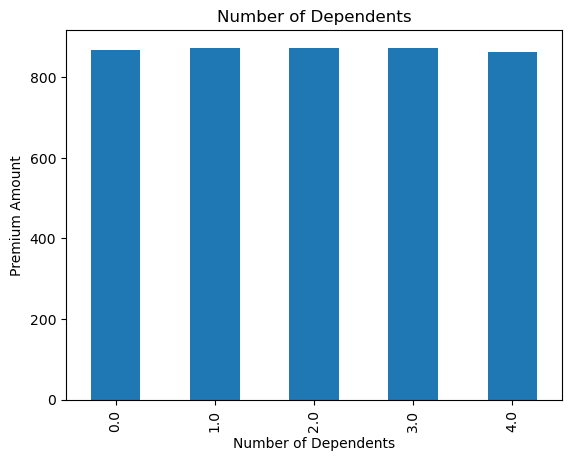

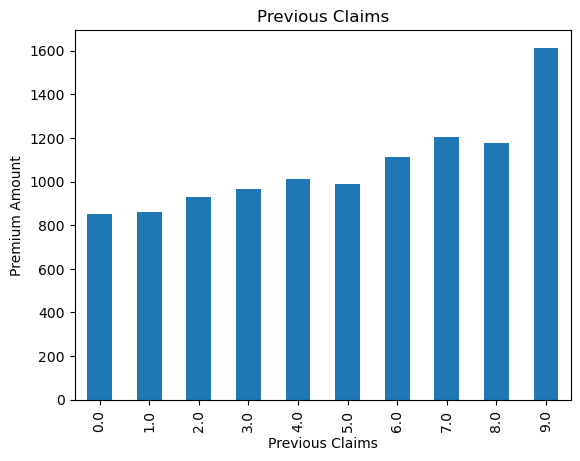

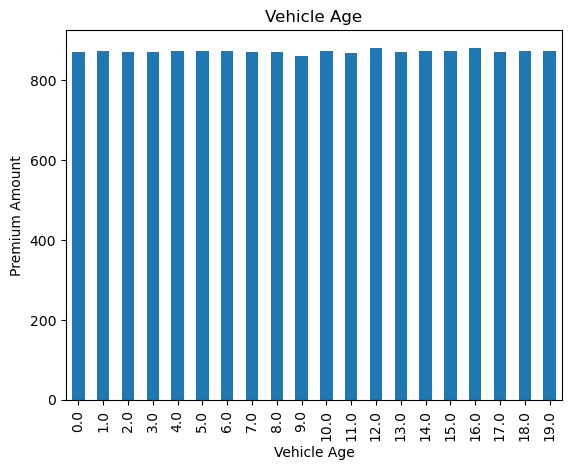

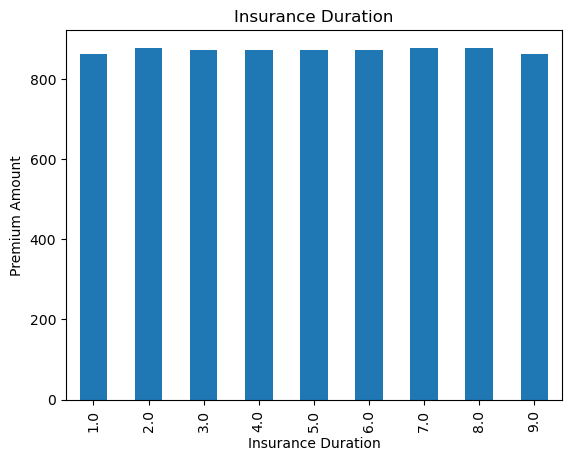

In [14]:
# finding the relationship between the discrete features and target (plots) 

for feature in discretefeature:
    data = df.copy()
    data.groupby(feature)["Premium Amount"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Premium Amount")
    plt.title(feature)
    plt.show()

In [15]:
continuousfeature = [feature for feature in numericalfeatures if feature not in discretefeature]

print("Continuous feature count: {}".format(len(continuousfeature)))
continuousfeature

Continuous feature count: 5


['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']

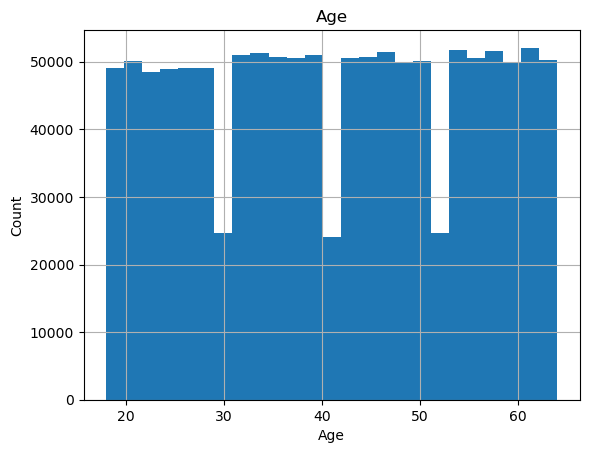

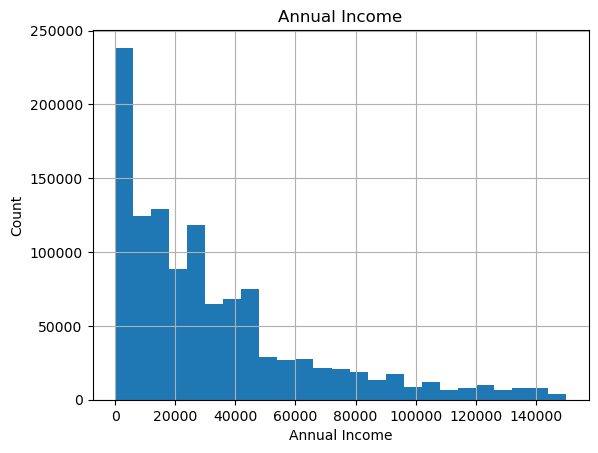

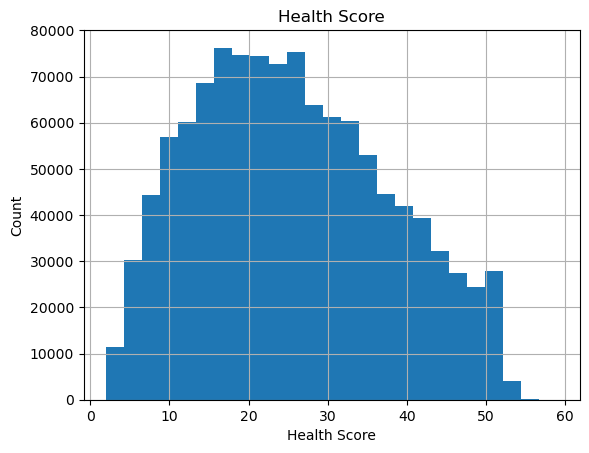

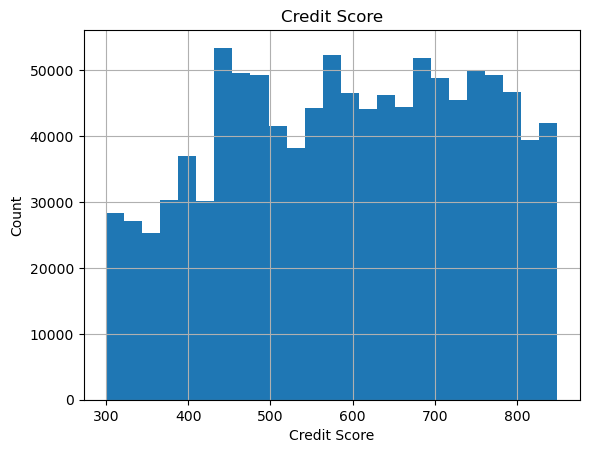

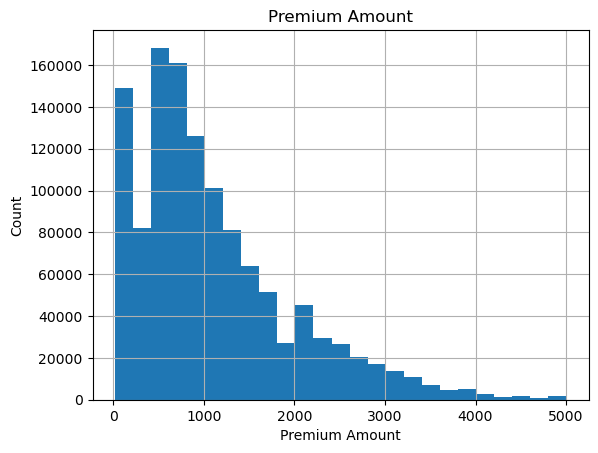

In [16]:
## analysing the continous features by creating histogram to understand the distribution of the values

for feature in continuousfeature:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

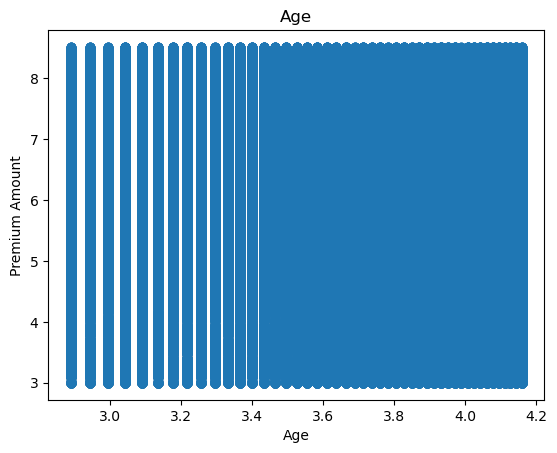

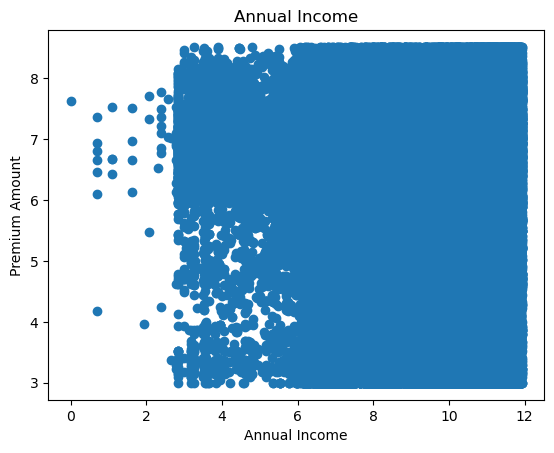

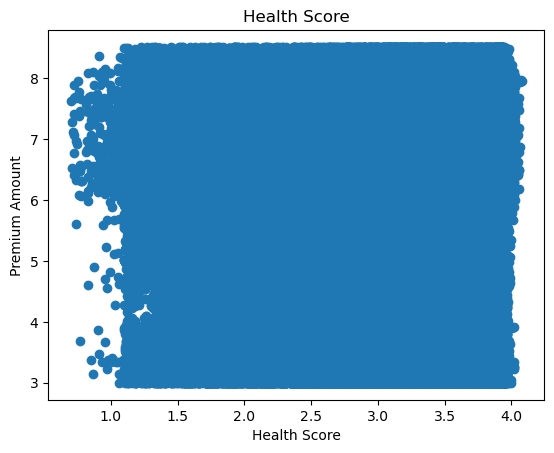

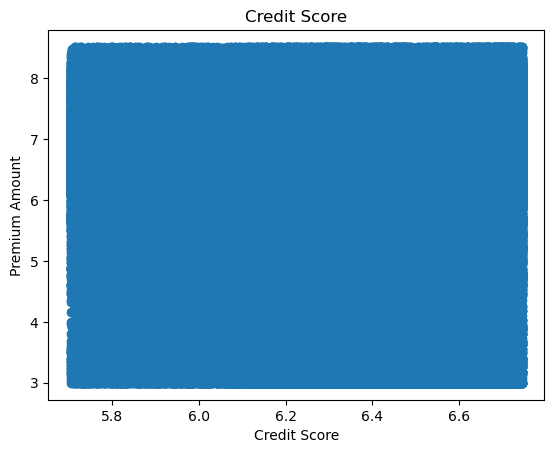

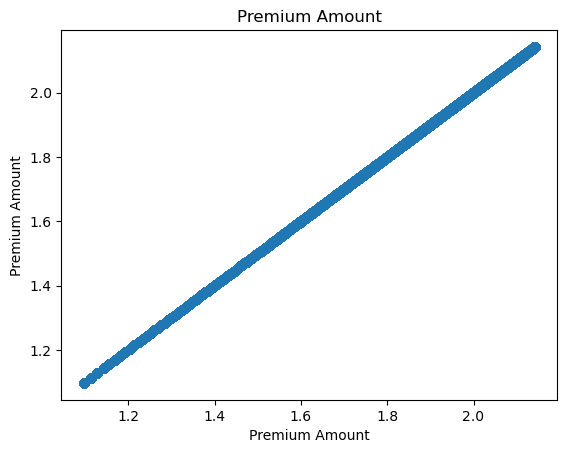

In [17]:
# normalising the distributions of the continuous features

for feature in continuousfeature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Premium Amount']=np.log(data['Premium Amount'])
        plt.scatter(data[feature],data['Premium Amount'])
        plt.xlabel(feature)
        plt.ylabel('Premium Amount')
        plt.title(feature)
        plt.show()

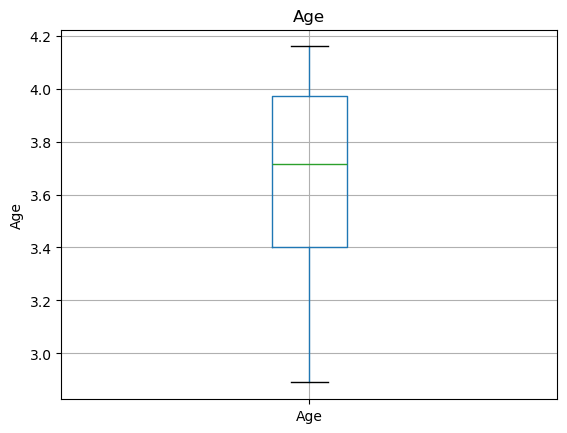

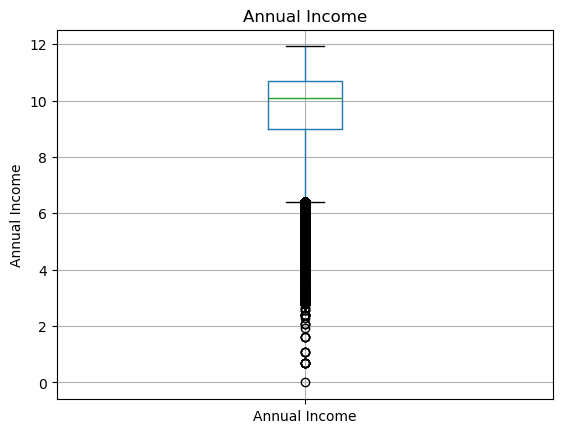

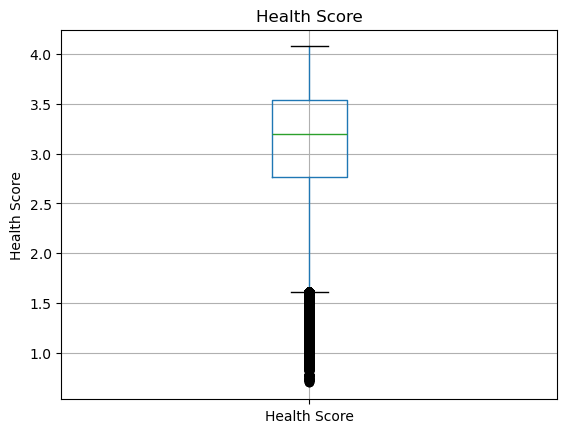

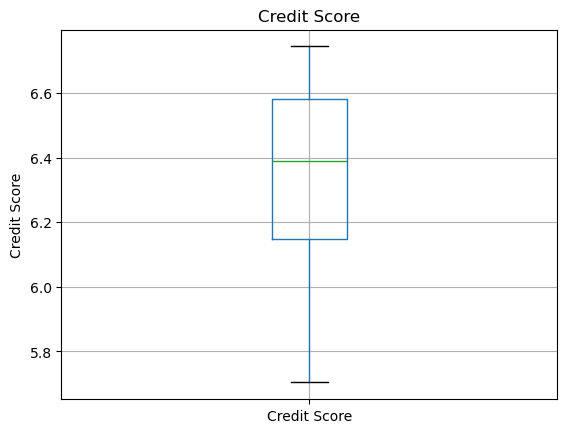

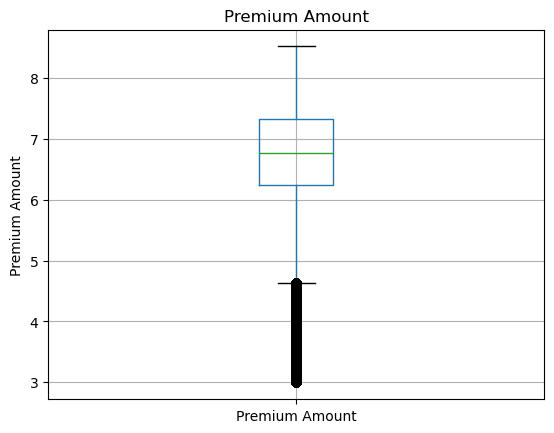

In [18]:
# boxplots for continuous features.

for feature in continuousfeature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        # plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [19]:
categoricalfeatures = [feature for feature in df.columns if df[feature].dtypes=='O']

categoricalfeatures

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [20]:
df[categoricalfeatures].head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,Poor,No,Weekly,House
1,Female,Divorced,Master's,NaN,Rural,Comprehensive,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,NaN,Rural,Basic,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,Poor,Yes,Weekly,House


In [21]:
# for categorical features: focus on cardinality values(how many different categories you have in the column)

for feature in categoricalfeatures:
    print("The feature is {} and number of categories are {}".format(feature,len(df[feature].unique())))

The feature is Gender and number of categories are 2
The feature is Marital Status and number of categories are 4
The feature is Education Level and number of categories are 4
The feature is Occupation and number of categories are 4
The feature is Location and number of categories are 3
The feature is Policy Type and number of categories are 3
The feature is Customer Feedback and number of categories are 4
The feature is Smoking Status and number of categories are 2
The feature is Exercise Frequency and number of categories are 4
The feature is Property Type and number of categories are 3


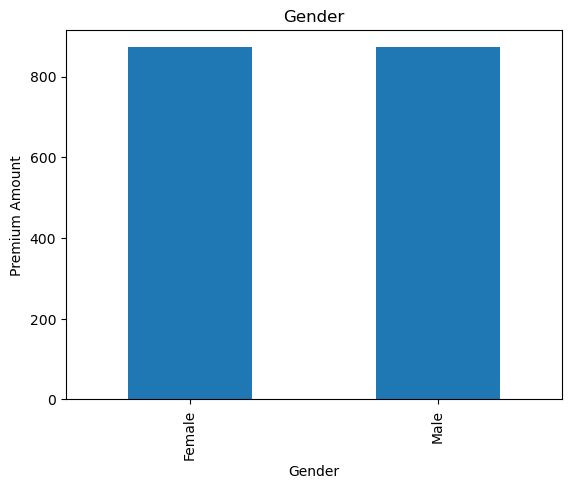

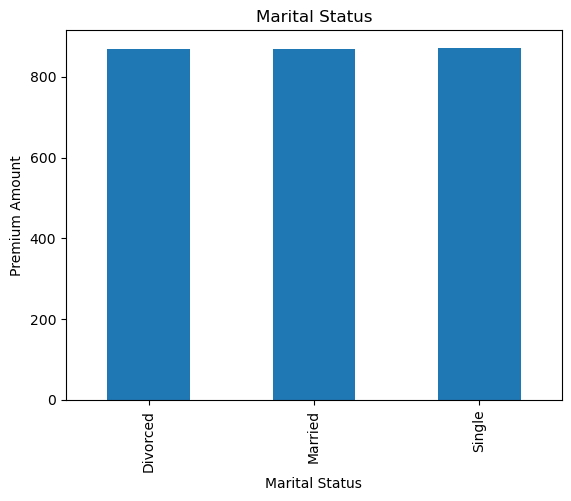

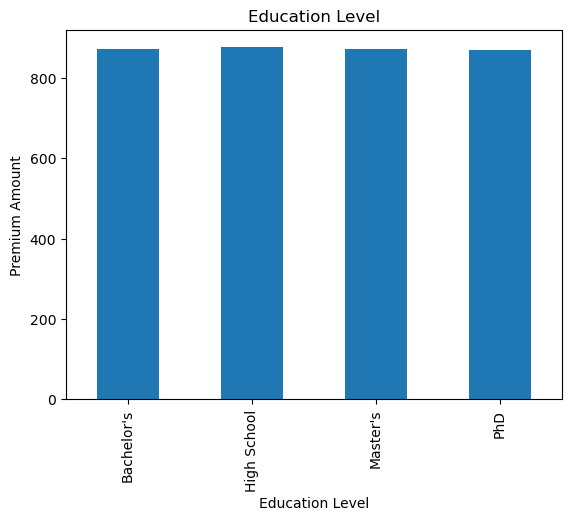

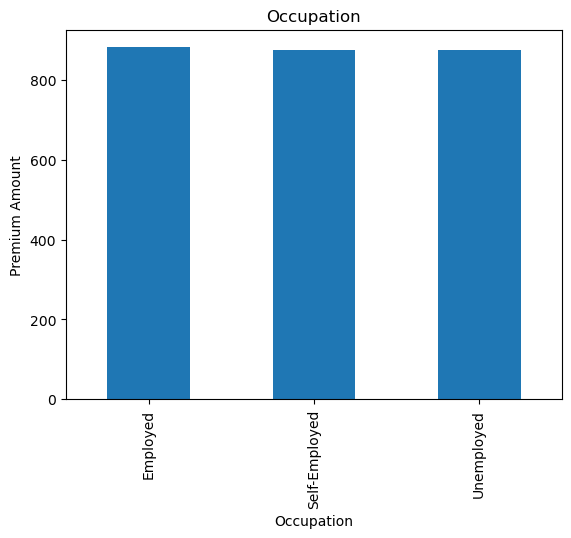

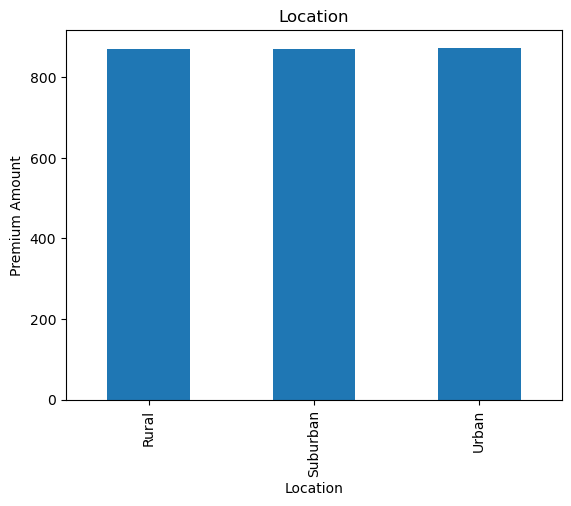

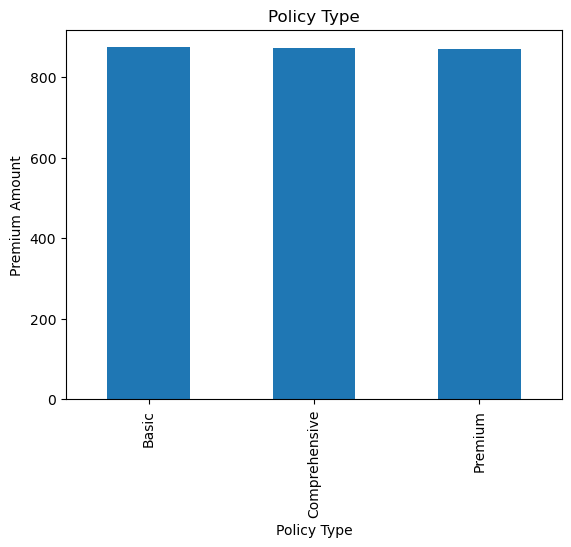

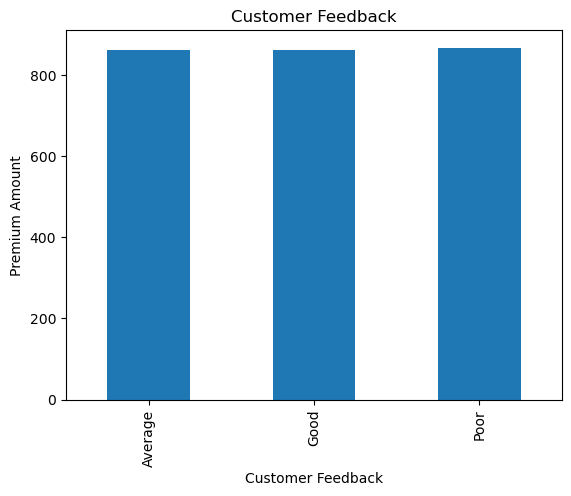

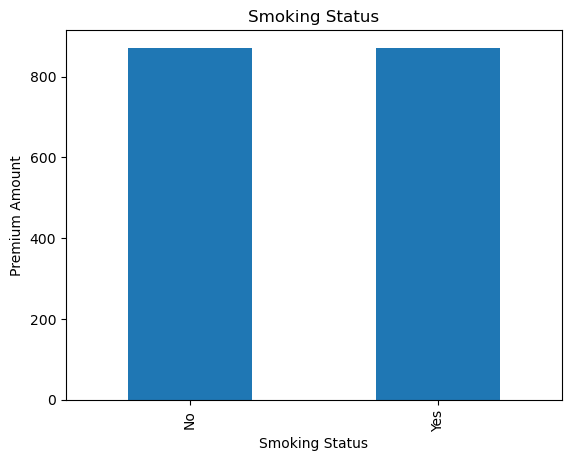

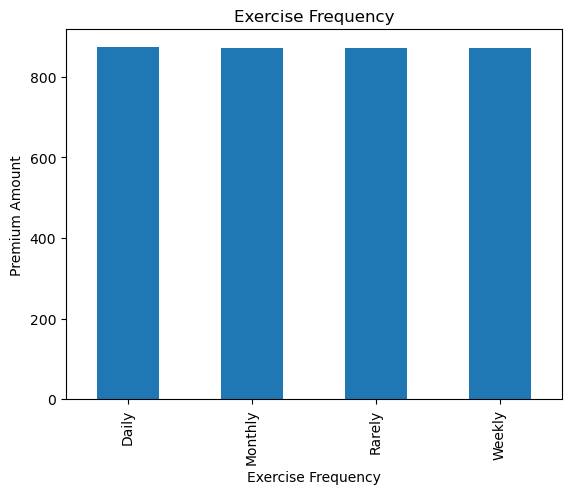

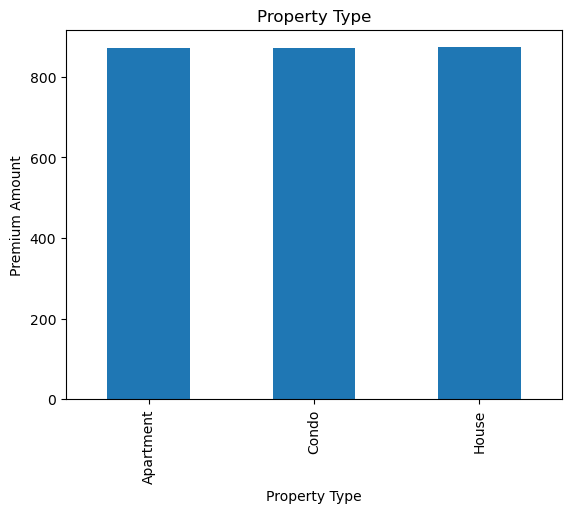

In [22]:
# finding the relationship between categorical features and target feature:

for feature in categoricalfeatures:
    data = df.copy()
    data.groupby(feature)['Premium Amount'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Premium Amount')
    plt.title(feature)
    plt.show()

# Feature Engineering

In [23]:
# first handle missing values in categorical features:
cat_features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in cat_features_with_nan:
    print(f"{feature}: {np.round(df[feature].isnull().mean() * 100,4)}% Missig values")
                

Marital Status: 1.5441% Missig values
Occupation: 29.8396% Missig values
Customer Feedback: 6.4853% Missig values


In [24]:
# replace missing values with new label

def replace_missing_values(df,cat_features_with_nan):
    data = df.copy()
    data[cat_features_with_nan]=data[cat_features_with_nan].fillna('Missing')
    return data

df = replace_missing_values(df,cat_features_with_nan)

df[cat_features_with_nan].isnull().sum()

Marital Status       0
Occupation           0
Customer Feedback    0
dtype: int64

In [25]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Missing,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,Missing,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0


In [26]:
## capturing NaN values for numerical features

num_features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtypes!='O']

for feature in num_features_with_nan:
    print(f"{feature}: {np.round(df[feature].isnull().mean(),4)}% missing value")

Age: 0.0156% missing value
Annual Income: 0.0375% missing value
Number of Dependents: 0.0914% missing value
Health Score: 0.0617% missing value
Previous Claims: 0.3034% missing value
Vehicle Age: 0.0% missing value
Credit Score: 0.1149% missing value
Insurance Duration: 0.0% missing value


In [27]:
# replacing the missing numerical values with either median or mode. 

for feature in num_features_with_nan:
    medianvalues = df[feature].median() # variable stored with median of the values of the feature

    df[feature+'_NaN'] = np.where(df[feature].isnull(),1,0)
    df[feature].fillna(medianvalues, inplace=True)

df[num_features_with_nan].isnull().sum() # rechecking whether all features are now not empty


C:\Users\ishaa\AppData\Local\Temp\ipykernel_19124\1477918891.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(medianvalues, inplace=True)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_19124\1477918891.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Age                     0
Annual Income           0
Number of Dependents    0
Health Score            0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
dtype: int64

In [28]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Property Type,Premium Amount,Age_NaN,Annual Income_NaN,Number of Dependents_NaN,Health Score_NaN,Previous Claims_NaN,Vehicle Age_NaN,Credit Score_NaN,Insurance Duration_NaN
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,House,2869.0,0,0,0,0,0,0,0,0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Missing,15.569731,Rural,Comprehensive,...,House,1483.0,0,0,0,0,0,0,0,0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,House,567.0,0,0,0,0,0,0,1,0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,Missing,10.938144,Rural,Basic,...,Apartment,765.0,0,0,0,0,0,0,0,0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,House,2022.0,0,0,0,0,0,0,0,0


In [29]:
df.shape

(1200000, 27)

In [30]:
# handling the rare categories in each categorical feature:

for feature in categoricalfeatures:
    temp = df.groupby(feature)['Premium Amount'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

temp_df

Index(['Apartment', 'Condo', 'House'], dtype='object', name='Property Type')

In [31]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Property Type,Premium Amount,Age_NaN,Annual Income_NaN,Number of Dependents_NaN,Health Score_NaN,Previous Claims_NaN,Vehicle Age_NaN,Credit Score_NaN,Insurance Duration_NaN
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,House,2869.0,0,0,0,0,0,0,0,0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Missing,15.569731,Rural,Comprehensive,...,House,1483.0,0,0,0,0,0,0,0,0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,House,567.0,0,0,0,0,0,0,1,0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,Missing,10.938144,Rural,Basic,...,Apartment,765.0,0,0,0,0,0,0,0,0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,House,2022.0,0,0,0,0,0,0,0,0


In [32]:
for feature in df:
    print(f"{feature} : {df[feature].dtype} and the unique categories are {df[feature].unique()} ")
    

Age : float64 and the unique categories are [19. 39. 23. 21. 29. 41. 48. 44. 56. 25. 40. 18. 59. 34. 22. 46. 49. 42.
 43. 64. 52. 37. 58. 50. 35. 61. 31. 54. 45. 30. 33. 28. 62. 53. 47. 27.
 38. 63. 32. 36. 20. 51. 55. 57. 24. 60. 26.] 
Gender : object and the unique categories are ['Female' 'Male'] 
Annual Income : float64 and the unique categories are [ 10049.  31678.  25602. ... 125361. 137940.  40368.] 
Marital Status : object and the unique categories are ['Married' 'Divorced' 'Single' 'Missing'] 
Number of Dependents : float64 and the unique categories are [1. 3. 2. 0. 4.] 
Education Level : object and the unique categories are ["Bachelor's" "Master's" 'High School' 'PhD'] 
Occupation : object and the unique categories are ['Self-Employed' 'Missing' 'Employed' 'Unemployed'] 
Health Score : float64 and the unique categories are [22.59876067 15.56973099 47.17754929 ... 47.09690866 13.6616783
 11.48348225] 
Location : object and the unique categories are ['Urban' 'Rural' 'Suburban']

In [33]:
# label encoder for binary categorical features:

from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Smoking Status']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [34]:
# manual mapping for ordinal categorical features with no ranks among them

# Feedback has an implicit order
df['Customer Feedback'] = df['Customer Feedback'].map({
    'Poor': 0,
    'Average': 1,
    'Good': 2,
    'Missing': -1  
})

df['Education Level'] = df['Education Level'].map({
    'High School': 0,
    "Bachelor's": 1,
    "Master's": 2,
    'PhD': 3
})



In [35]:
one_hot_cols = ['Marital Status', 'Occupation', 'Location', 'Policy Type', 
                'Exercise Frequency', 'Property Type']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [36]:
print(df.dtypes.tail(10))

Occupation_Unemployed         bool
Location_Suburban             bool
Location_Urban                bool
Policy Type_Comprehensive     bool
Policy Type_Premium           bool
Exercise Frequency_Monthly    bool
Exercise Frequency_Rarely     bool
Exercise Frequency_Weekly     bool
Property Type_Condo           bool
Property Type_House           bool
dtype: object


In [37]:
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [38]:
df.head()

,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,...,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,19.0,0,10049.0,1.0,1,22.598761,2.0,17.0,372.0,5.0,...,0,0,1,0,1,0,0,1,0,1
1,39.0,0,31678.0,3.0,2,15.569731,1.0,12.0,694.0,2.0,...,0,0,0,1,0,1,0,0,0,1
2,23.0,1,25602.0,3.0,0,47.177549,1.0,14.0,595.0,3.0,...,0,1,0,0,1,0,0,1,0,1
3,21.0,1,141855.0,2.0,1,10.938144,1.0,0.0,367.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,1,39651.0,1.0,1,20.376094,0.0,8.0,598.0,4.0,...,0,0,0,0,1,0,0,1,0,1


In [39]:
# splitting the dataset for training and evaluation

from sklearn.model_selection import train_test_split

X = df.drop(columns=["Premium Amount"])
y = df["Premium Amount"]


In [40]:

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [40]:
# feature scaling:

In [41]:
from sklearn.preprocessing import StandardScaler

numeric_features = [feature for feature in X_train.columns if X_train[feature].dtype != 'O' ]
sc = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_train_scaled[numeric_features] = sc.fit_transform(X_train[numeric_features])
X_val_scaled[numeric_features] = sc.transform(X_val[numeric_features])

In [42]:
print(X_train_scaled.isnull().sum().sort_values(ascending=False).head(10))


Age                         0
Location_Suburban           0
Marital Status_Married      0
Marital Status_Missing      0
Marital Status_Single       0
Occupation_Missing          0
Occupation_Self-Employed    0
Occupation_Unemployed       0
Location_Urban              0
Credit Score_NaN            0
dtype: int64


In [43]:
print(X_val_scaled.isnull().sum().sort_values(ascending=False).head(10))


Age                         0
Location_Suburban           0
Marital Status_Married      0
Marital Status_Missing      0
Marital Status_Single       0
Occupation_Missing          0
Occupation_Self-Employed    0
Occupation_Unemployed       0
Location_Urban              0
Credit Score_NaN            0
dtype: int64


In [44]:
# Model Development:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def model_evaluation(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    


In [47]:
# Linear regression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_preds = lr_model.predict(X_val_scaled)

print("Linear Regression Performance:")
model_evaluation(y_val, lr_preds)


Linear Regression Performance:
RMSE: 861.85
MAE: 665.64
R² Score: 0.01


(861.8501696189508, 665.6370378384058, 0.006021621901594498)

In [50]:
# decision tree

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_preds = dt_model_tuned.predict(X_val_scaled)
model_evaluation(y_val, dt_preds)


RMSE: 841.54
MAE: 634.08
R² Score: 0.05


(841.5376662840413, 634.0844324680838, 0.05232262347298777)

In [52]:
# random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf_tuned.predict(X_val_scaled)
model_evaluation(y_val, rf_preds)


RMSE: 838.91
MAE: 632.88
R² Score: 0.06


(838.9142042427055, 632.8759845217288, 0.0582221105987637)

In [55]:
# XGBoost regressor

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=150, max_depth=6, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_preds = xgb_tuned.predict(X_val_scaled)
model_evaluation(y_val, xgb_preds)


RMSE: 840.95
MAE: 639.08
R² Score: 0.05


(840.9549975423022, 639.0756641145706, 0.05363448590098041)

## Uptill now, we did everything manually. Now, we implement pipelines to automatically do all these steps. 



# Pipeline Implementation 

In [ ]:
num_cols = [col for col in X_train.columns if X_train[col].dtype != "O"]
cat_cols = [col for col in X_train.columns if X_train[col].dtype == "O"]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [ ]:

steps1 = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]
numeric_transformer = Pipeline(steps1)

steps2=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='Missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
]
categorical_transformer = Pipeline(steps2)

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])



In [2]:
import pandas as pd
import numpy as np
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('./playground/train.csv')
df = df.drop(columns=['id','Policy Start Date'])




In [3]:

def model_evaluate(df, model_type):
    X = df.drop("Premium Amount",axis = 1)
    y = df['Premium Amount']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    numerical_cols = [col for col in X_train.columns if X_train[col].dtype != "O"]
    categorical_cols = [col for col in X_train.columns if X_train[col].dtype == "O"]
    
    steps1 = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
    numeric_transformer = Pipeline(steps1)

    steps2=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
    categorical_transformer = Pipeline(steps2)

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    if model_type == 'linear':
        model = LinearRegression()
    elif model_type == 'decision_tree':
        model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
    elif model_type == 'random_forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    elif model_type == 'xgboost':
        model = XGBRegressor(n_estimators=150, max_depth=6, learning_rate=0.1, random_state=42)
    else:
        raise ValueError(" Supported model types: 'linear', 'decision_tree', 'random_forest', 'xgboost' ")


    steps3 = [
        ('preprocessor', preprocessor),
        ('model', model)
    ]
    final_pipeline = Pipeline(steps3)

    mlflow.set_experiment("Insurance_Premium_Prediction")
    mlflow.set_tracking_uri("http://127.0.0.1:5000")
    with mlflow.start_run(run_name=f"{model_type}_new_experiment"):

        final_pipeline.fit(X_train, y_train)
        y_pred = final_pipeline.predict(X_val)

        rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        mlflow.log_param("model_type", model_type)
        if model_type == 'decision_tree':
            mlflow.log_param("max_depth", model.max_depth)
            mlflow.log_param("min_samples_split", model.min_samples_split)
        elif model_type == 'random_forest':
            mlflow.log_param("n_estimators", model.n_estimators)
        elif model_type == 'xgboost':
            mlflow.log_param("n_estimators", model.n_estimators)
            mlflow.log_param("max_depth", model.max_depth)
            mlflow.log_param("learning_rate", model.learning_rate)

        mlflow.log_metric("RMSE", rmsle)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        mlflow.sklearn.log_model(final_pipeline, "model_pipeline")

        print(f"Model: {model_type}")
        print(f"RMSLE: {rmsle:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"R² Score: {r2:.2f}")

    return final_pipeline 

In [4]:

for model_type in ['linear', 'decision_tree', 'random_forest', 'xgboost']:
    model_evaluate(df, model_type)

2025/07/25 16:13:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/25 16:13:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: linear
RMSLE: 1.17
RMSE: 863.34
MAE: 667.28
R² Score: 0.00
🏃 View run linear_new_experiment at: http://127.0.0.1:5000/#/experiments/997466687632691077/runs/8cdb24a6eb3a4259b45a3709352ae4e2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/997466687632691077


2025/07/25 16:14:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/25 16:14:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: decision_tree
RMSLE: 1.15
RMSE: 848.96
MAE: 643.66
R² Score: 0.04
🏃 View run decision_tree_new_experiment at: http://127.0.0.1:5000/#/experiments/997466687632691077/runs/2dc830e658ea4dd7b3676e87654db855
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/997466687632691077


2025/07/25 17:04:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/25 17:08:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: random_forest
RMSLE: 1.17
RMSE: 855.92
MAE: 660.87
R² Score: 0.02
🏃 View run random_forest_new_experiment at: http://127.0.0.1:5000/#/experiments/997466687632691077/runs/2d9f8074b09541c7b7fc49178d0a70b8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/997466687632691077


2025/07/25 17:08:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/25 17:09:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: xgboost
RMSLE: 1.15
RMSE: 847.06
MAE: 646.53
R² Score: 0.04
🏃 View run xgboost_new_experiment at: http://127.0.0.1:5000/#/experiments/997466687632691077/runs/3997a576e8754b5f8609f51f715132b7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/997466687632691077


In [6]:
from mlflow.tracking import MlflowClient

model_name = 'Insurance Premium Calculator - XGBoost regressor model'
run_id = input('Please input run_id: ')  # the dicision tree run id: 45f976c9657a490aac821ede757f1129
model_uri = f'runs:/{run_id}/model_pipeline' 

client = MlflowClient()
client.create_registered_model(model_name)
client.create_model_version(name=model_name, source=model_uri, run_id=run_id)


2025/07/25 17:27:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Insurance Premium Calculator - XGBoost regressor model, version 1


<ModelVersion: aliases=[], creation_timestamp=1753444662335, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1753444662335, metrics=None, model_id=None, name='Insurance Premium Calculator - XGBoost regressor model', params=None, run_id='3997a576e8754b5f8609f51f715132b7', run_link='', source='runs:/3997a576e8754b5f8609f51f715132b7/model_pipeline', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [7]:
import mlflow.pyfunc

model = mlflow.pyfunc.load_model("models:/Insurance Premium Calculator - XGBoost regressor model/1")


import joblib

joblib.dump(model, "model.pkl")


['model.pkl']